In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [301]:
def plot_hyperparams(data, hyperparams, metric1, metric2):
  colors = cm.tab20(np.linspace(0, 1, data.shape[0]))
  fig = plt.figure(figsize=(12,6))
  for i in range(data.shape[0]):
    plt.scatter(d[metric1][i], d[metric2][i], label=d.loc[i, hyperparams],
                color=colors[i], marker='x', s=300, linewidth=5)
  plt.xlabel(metric1)
  plt.ylabel(metric2)
  plt.legend(bbox_to_anchor=(1.3, 1.05))

In [312]:
path = 'logs/adult/'
experiment = 'race-odds'
fname = path + experiment + '-eval.csv'

In [313]:
d = pd.read_csv(fname)
d = d[d.evaluation_file == 'valid_set']
d.drop('Unnamed: 0', axis=1, inplace=True)
d.reset_index(drop=True, inplace=True)

In [314]:
d.head()

,accuracy,accuracy_0,accuracy_1,accuracy_2,accuracy_3,accuracy_4,alpha,calibration_neg_0,calibration_neg_1,calibration_neg_2,...,true_pos_0,true_pos_1,true_pos_2,true_pos_3,true_pos_4,y_hat_0,y_hat_1,y_hat_2,y_hat_3,y_hat_4
0,0.841548,0.833899,0.917949,0.803653,0.879310,0.923077,1,0.151671,0.151671,0.151671,...,645,29,29,3,4,0.857653,0.935043,0.799087,0.948276,0.865385
1,0.834178,0.825683,0.914530,0.808219,0.879310,0.903846,1,0.166954,0.166954,0.166954,...,533,25,28,3,4,0.889445,0.945299,0.812785,0.948276,0.846154
2,0.800860,0.790677,0.899145,0.771689,0.862069,0.846154,1,0.195735,0.195735,0.195735,...,348,15,22,2,1,0.920522,0.964103,0.831050,0.965517,0.903846
3,0.821434,0.812824,0.909402,0.780822,0.862069,0.884615,1,0.179665,0.179665,0.179665,...,454,20,22,2,3,0.904804,0.957265,0.840183,0.965517,0.865385
4,0.821895,0.813717,0.907692,0.771689,0.879310,0.884615,1,0.178705,0.178705,0.178705,...,462,19,21,4,3,0.902840,0.958974,0.840183,0.913793,0.865385


In [315]:
hyperparams = ['learning_rate', 'total_num_iters', 'n_h', 'n_h_adv', 'dropout_rate', 'alpha']
metrics = [col for col in d.columns if col not in hyperparams and col != 'Unnamed: 0']
print(hyperparams)
print(metrics)
hyperparams_to_plot = [col for col in hyperparams if col not in ['total_num_iters']]

['learning_rate', 'total_num_iters', 'n_h', 'n_h_adv', 'dropout_rate', 'alpha']
['accuracy', 'accuracy_0', 'accuracy_1', 'accuracy_2', 'accuracy_3', 'accuracy_4', 'calibration_neg_0', 'calibration_neg_1', 'calibration_neg_2', 'calibration_neg_3', 'calibration_neg_4', 'calibration_neg_gap_0', 'calibration_neg_gap_1', 'calibration_neg_gap_2', 'calibration_neg_gap_3', 'calibration_neg_gap_4', 'calibration_pos_0', 'calibration_pos_1', 'calibration_pos_2', 'calibration_pos_3', 'calibration_pos_4', 'calibration_pos_gap_0', 'calibration_pos_gap_1', 'calibration_pos_gap_2', 'calibration_pos_gap_3', 'calibration_pos_gap_4', 'count_0', 'count_1', 'count_2', 'count_3', 'count_4', 'evaluation_file', 'false_neg_0', 'false_neg_1', 'false_neg_2', 'false_neg_3', 'false_neg_4', 'false_pos_0', 'false_pos_1', 'false_pos_2', 'false_pos_3', 'false_pos_4', 'fn_0', 'fn_1', 'fn_2', 'fn_3', 'fn_4', 'fn_gap_0', 'fn_gap_1', 'fn_gap_2', 'fn_gap_3', 'fn_gap_4', 'fp_0', 'fp_1', 'fp_2', 'fp_3', 'fp_4', 'fp_gap_0', '

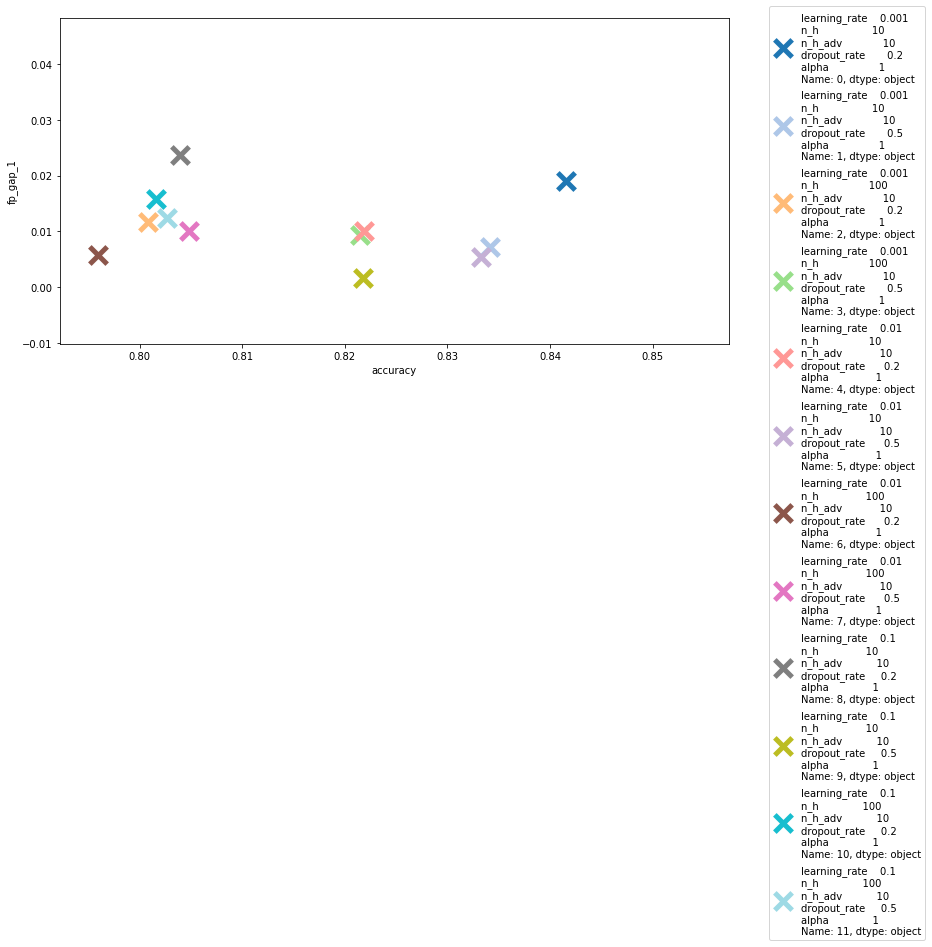

In [316]:
plot_hyperparams(d, hyperparams_to_plot, 'accuracy', 'fp_gap_1')